In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import pandas as pd
import shap

Results
- With a MAPE of 4.7% the model shows that it can be used in a real scenario
- As we can see in the charts, the three main variables - Light sleep percentage, awakenings, and Deep sleep percentage - are the most influential in the target variable (Sleep efficiency).
- The model results can confirm some of the aspects seen at the EDA.


# Visualizing the data

In [46]:
sleep_df= pd.read_csv("Sleep_Efficiency.csv")
sleep_df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


Visualizing the columns with object type 

In [47]:
sleep_df.select_dtypes("object").columns

Index(['Gender', 'Bedtime', 'Wakeup time', 'Smoking status'], dtype='object')

# Training the model 

- First of all, the rows with missing values (NaN) are removed from the dataframe. 
- Then the dataset is divided between x and y parts, the first one contains most of the original columns, except the target variable and the irrelevant ones. The Y part includes onle the target variable. 
- Transforming the object values at the X part in dummies.
- Assigning random values to the test and train variables accordind to the respective parts. 

In [48]:
sleep_df = sleep_df.dropna()
X, y= sleep_df.drop(columns=["Sleep efficiency","ID", "Bedtime","Wakeup time"]),sleep_df['Sleep efficiency']
X = pd.get_dummies(X, columns=X.select_dtypes("object").columns, drop_first=True)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42)
xtrain

,Age,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Gender_Male,Smoking status_Yes
172,27,8.0,25,20,55,3.0,0.0,0.0,2.0,1,1
8,41,6.0,28,55,17,3.0,50.0,0.0,1.0,0,0
22,29,8.0,23,60,17,2.0,75.0,0.0,2.0,0,0
302,25,7.0,25,55,20,4.0,0.0,5.0,3.0,1,0
425,26,6.0,28,55,17,0.0,50.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
84,50,6.0,22,22,56,4.0,0.0,3.0,0.0,1,0
121,15,8.0,20,35,45,1.0,0.0,0.0,0.0,0,0
312,50,9.0,27,55,18,1.0,0.0,3.0,3.0,1,0
402,38,8.0,18,70,12,0.0,0.0,0.0,3.0,1,1


In [49]:
model=RandomForestRegressor(min_samples_split=10)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
y_train_pred = model.predict(xtrain)

test_mae = mean_absolute_error(ytest, y_pred)
test_mape = mean_absolute_percentage_error(ytest, y_pred)
test_rmse = mean_squared_error(ytest, y_pred)
train_mae = mean_absolute_error(ytrain, y_train_pred)
train_mape = mean_absolute_percentage_error(ytrain, y_train_pred)
train_rmse = mean_squared_error(ytrain, y_train_pred)

print(f"Train MAE: {train_mae}")
print(f"Train MAPE: {train_mape}")
print(f"Train RMSE: {train_rmse}")

print(f"Test MAE: {test_mae}")
print(f"Test MAPE: {test_mape}")
print(f"Test RMSE: {test_rmse}")


Train MAE: 0.024635995649422857
Train MAPE: 0.031945600916013034
Train RMSE: 0.0010424386539103865
Test MAE: 0.03350983241244444
Test MAPE: 0.04725241162715989
Test RMSE: 0.0018448134623870046


In [50]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtrain)
shap_obj = explainer(xtrain)

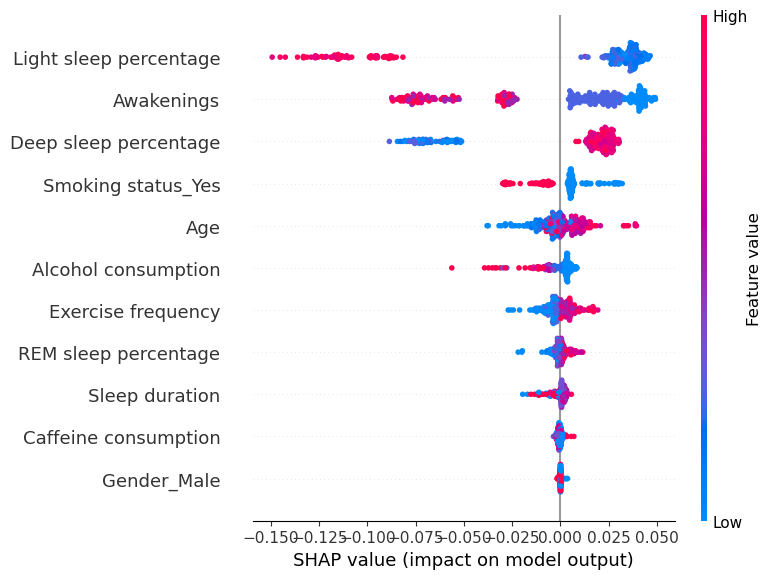

In [51]:
shap.summary_plot(shap_values, xtrain)

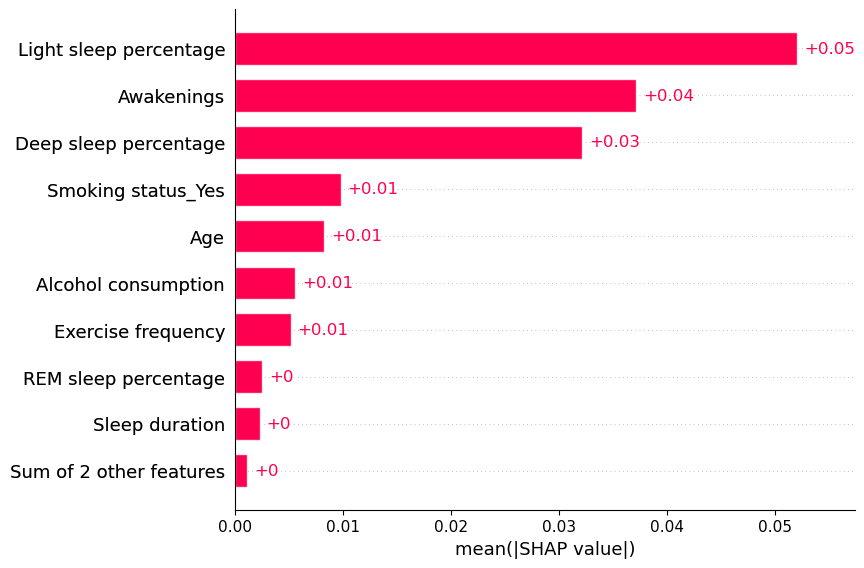

In [52]:
shap.plots.bar(shap_obj[:,:])